In [1]:
# Imports
import os
from datetime import datetime

import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

2023-07-26 15:11:02.530034: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-26 15:11:02.593982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-26 15:11:02.594011: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Get Coinbase Dataset
coinbase = "data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv"

coinbase_df = pd.read_csv(coinbase)

In [3]:
# Display dataframe in it's current state
coinbase_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


<AxesSubplot: xlabel='Timestamp'>

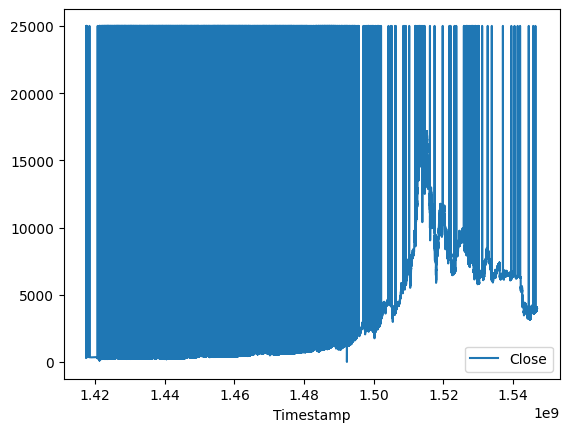

In [4]:
# Change all NaN to 25000 to see on plot and Visualize to see if there is a big
# set of data we should drop
coinbase_df_extra = coinbase_df.fillna(25000)
coinbase_df_extra.plot(x='Timestamp', y='Close', kind='line')

<AxesSubplot: xlabel='Timestamp'>

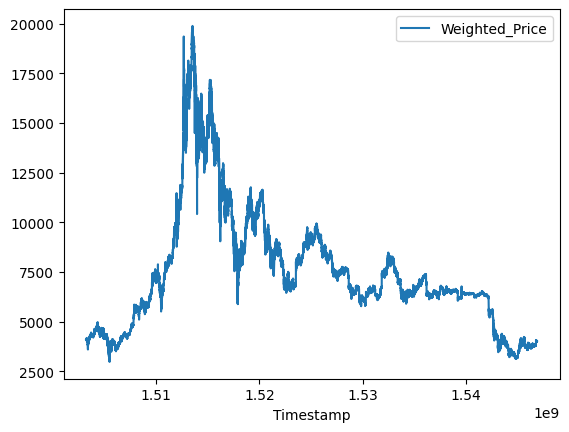

In [5]:
# Convert date string to timestamp because I(as a person) can't read timestamp
date = '2017-08-20'
element = datetime.strptime(date, "%Y-%m-%d")
timestamp = datetime.timestamp(element)

# Based on above, want to drop all rows up to August 20, 2017
drop_dates_df = coinbase_df[coinbase_df_extra['Timestamp'] >= timestamp]

# Perform Linear inrerpolation to populate values for all NaNs
remove_nan_df = drop_dates_df.interpolate()

remove_nan_df.plot(x='Timestamp', y=['Weighted_Price'], kind='line')

In [6]:
# Save df to use throughout rest of project
# All NaN's are now removed and data is in good timeframe
df = remove_nan_df
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1371533,1503205200,4098.99,4099.80,4098.99,4099.80,2.020094,8280.577129,4099.104696
1371534,1503205260,4099.79,4099.79,4098.09,4099.51,3.454815,14159.826872,4098.577954
1371535,1503205320,4099.50,4099.50,4098.01,4098.02,1.276324,5230.416097,4098.030615
1371536,1503205380,4098.02,4099.80,4098.02,4099.79,1.793600,7351.467538,4098.721500
1371537,1503205440,4099.79,4100.00,4099.79,4100.00,3.591501,14724.473858,4099.810414
...,...,...,...,...,...,...,...,...
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


In [7]:
# I'm thinking minute by minute data is going to be too noisy
# So, let's only get every hour
df = df[::60]
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1371533,1503205200,4098.99,4099.80,4098.99,4099.80,2.020094,8280.577129,4099.104696
1371593,1503208800,4095.60,4097.57,4095.60,4097.34,1.753949,7185.103130,4096.528593
1371653,1503212400,4098.04,4098.55,4098.04,4098.55,1.690034,6926.659521,4098.531894
1371713,1503216000,4135.00,4135.00,4135.00,4135.00,0.096314,398.260292,4135.000000
1371773,1503219600,4137.95,4137.95,4137.94,4137.95,0.410993,1700.667546,4137.949126
...,...,...,...,...,...,...,...,...
2099513,1546884000,4016.00,4016.00,4014.18,4014.18,0.837287,3361.638067,4014.917403
2099573,1546887600,4015.55,4015.56,4015.55,4015.56,2.795896,11227.067232,4015.551976
2099633,1546891200,4024.00,4025.00,4024.00,4025.00,10.042872,40413.837925,4024.131416
2099693,1546894800,4006.73,4007.01,4006.72,4007.01,21.797277,87340.366252,4006.939254


<AxesSubplot: xlabel='Timestamp'>

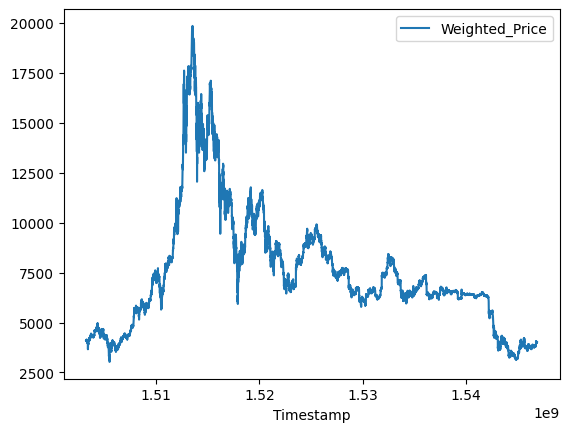

In [8]:
# Plot my hourly data
df.plot(x='Timestamp', y=['Weighted_Price'], kind='line')

## Above Here is all of my data cleaning
 - Linear fill for all NaN
 - Drop all data before a certain date because there were a lot of NaN

## Next, we are going to split the data into training/validation/test datasets
## Once data is split into sets, we will normalize
 - [Based on this paper](http://www.mirlabs.org/ijcisim/regular_papers_2014/IJCISIM_24.pdf), I tried using a tanh extimation normalization...it didn't work

 Normalization of financial data is weird...what happens in the future when
 our data is out of bounds from when we normalized...TO THE MOON!!

In [9]:
# Split the data to training/validation/test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [10]:
# Normalize the data
# Normaliziation formula from paper Zach sent
# norm = .5(tanh((0.01(data - mean))/sigma)+1)

# train_mean = train_df.mean(axis=0)
# train_sigma = train_df.std(axis=0)

# train_df = .5 * np.tanh((0.01 * (train_df - train_mean)) / train_sigma) + 1
# val_df = .5 * np.tanh((0.01 * (val_df - train_mean)) / train_sigma) + 1
# test_df = .5 * np.tanh((0.01 * (test_df - train_mean)) / train_sigma) + 1

# tanh estimation normalization didn't work, so here's typical normalization
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std



### Now that data is normalized. Let's create a 24 hour window to make each prediction

In [11]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [12]:
w2 = WindowGenerator(input_width=24, label_width=24, shift=1,
                     label_columns=['Weighted_Price'])
w2

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Weighted_Price']

In [13]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [14]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           ])

example_inputs, example_labels = w2.split_window(example_window)

2023-07-26 15:11:24.591728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-26 15:11:24.592401: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-26 15:11:24.592602: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BensLaptop): /proc/driver/nvidia/version does not exist
2023-07-26 15:11:24.607971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
w2.example = example_inputs, example_labels

In [16]:
def plot(self, model=None, plot_col='Weighted_Price', max_subplots=4):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [17]:
# Make Datasets
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [18]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [19]:
# Create a window for training
train_window = WindowGenerator(
    input_width=24,
    label_width=24,
    shift=1,
    label_columns=['Weighted_Price']
)

In [20]:
# Build a simple LSTM Model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(24, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [21]:
# Compile and fit model
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()]
                )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [22]:

history = compile_and_fit(lstm_model, train_window)

Epoch 1/20
265/265 [==============================] - 12s 24ms/step - loss: 0.1783 - mean_absolute_error: 0.2224 - val_loss: 0.0298 - val_mean_absolute_error: 0.1460
Epoch 2/20
265/265 [==============================] - 5s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0673 - val_loss: 0.0152 - val_mean_absolute_error: 0.0939
Epoch 3/20
265/265 [==============================] - 5s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0496 - val_loss: 0.0112 - val_mean_absolute_error: 0.0758
Epoch 4/20
265/265 [==============================] - 6s 20ms/step - loss: 0.0064 - mean_absolute_error: 0.0404 - val_loss: 0.0088 - val_mean_absolute_error: 0.0647
Epoch 5/20
265/265 [==============================] - 5s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0350 - val_loss: 0.0067 - val_mean_absolute_error: 0.0527
Epoch 6/20
265/265 [==============================] - 5s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0310 - val_loss: 0.0052 - val_mean_absolute_error: 0.0439
Epoch 7/2

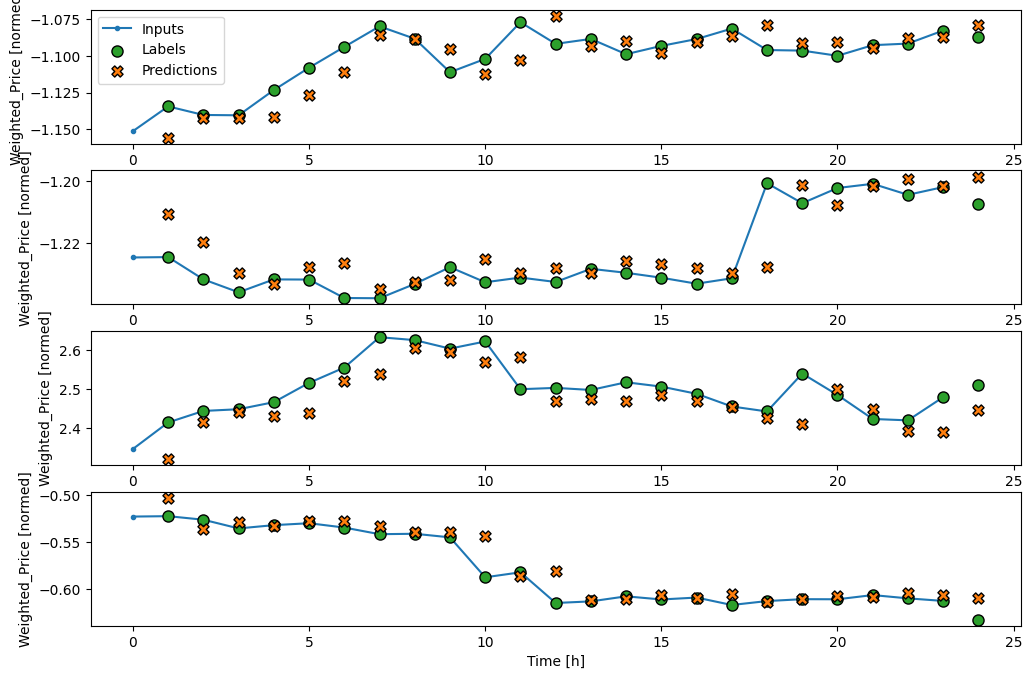

In [23]:
train_window.plot(lstm_model)